In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import cross_validation, metrics
from sklearn.preprocessing import RobustScaler
% matplotlib inline

/Users/SAKIB/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_mathematics= pd.read_csv("/Users/SAKIB/Desktop/Mathematics_Scores.csv")
data_portuguese = pd.read_csv("/Users/SAKIB/Desktop/Portuguese_Scores.csv" )

In [3]:
df_m_5L= data_mathematics.copy()
df_p_5L= data_portuguese.copy()
df_m_5L['G3']= np.where(df_m_5L['G3'].between(0,9)  , 0, df_m_5L['G3'])
df_m_5L['G3']= np.where(df_m_5L['G3'].between(10,11), 1, df_m_5L['G3'])
df_m_5L['G3']= np.where(df_m_5L['G3'].between(12,13), 2, df_m_5L['G3'])
df_m_5L['G3']= np.where(df_m_5L['G3'].between(14,15), 3, df_m_5L['G3'])
df_m_5L['G3']= np.where(df_m_5L['G3'].between(16,20), 4, df_m_5L['G3'])

df_p_5L['G3']= np.where(df_p_5L['G3'].between(0,9)  , 0, df_p_5L['G3'])
df_p_5L['G3']= np.where(df_p_5L['G3'].between(10,11), 1, df_p_5L['G3'])
df_p_5L['G3']= np.where(df_p_5L['G3'].between(12,13), 2, df_p_5L['G3'])
df_p_5L['G3']= np.where(df_p_5L['G3'].between(14,15), 3, df_p_5L['G3'])
df_p_5L['G3']= np.where(df_p_5L['G3'].between(16,20), 4, df_p_5L['G3'])

In [4]:
df_m_2L= df_m_5L.copy()
df_p_2L= df_p_5L.copy()
df_m_2L['G3']= np.where(df_m_2L['G3'].between(1,4)  , 1, df_m_2L['G3'])
df_p_2L['G3']= np.where(df_p_2L['G3'].between(1,4)  , 1, df_p_2L['G3'])

# Plotting the grade distribution:--------------------------------------------------------

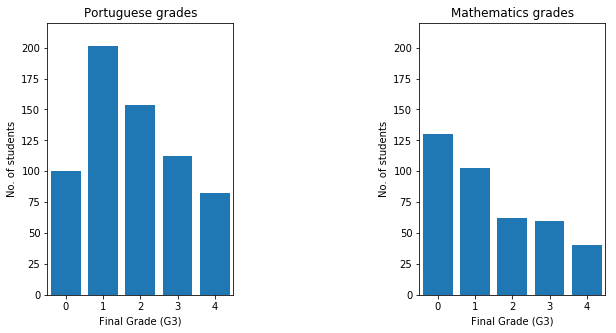

In [5]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(sorted(df_p_5L['G3'].unique()), df_p_5L['G3'].value_counts()[[0,1,2,3,4]])
plt.axis([-0.5,4.5,0,220])
plt.title('Portuguese grades');plt.xlabel('Final Grade (G3)');plt.ylabel('No. of students')
plt.subplot(1,2,2)
plt.bar(sorted(df_m_5L['G3'].unique()), df_m_5L['G3'].value_counts()[[0,1,2,3,4]])
plt.axis([-0.5,4.5,0,220])
plt.title('Mathematics grades');plt.xlabel('Final Grade (G3)');plt.ylabel('No. of students')
plt.subplots_adjust(wspace = 1,hspace=0.5)


In [6]:
# Label Encoding:

le= LabelEncoder()
for col in df_m_5L.columns.values:
    if df_m_5L[col].dtypes=='object':
        data=df_m_5L[col].append(df_m_5L[col])
        le.fit(data.values)
        df_m_5L[col]=le.transform(df_m_5L[col])
        df_p_5L[col]=le.transform(df_p_5L[col])

In [7]:
scaler = RobustScaler()
df_m_5L.iloc[:,0:32]= pd.DataFrame(scaler.fit_transform(df_m_5L.iloc[:,0:32]),columns=df_m_5L.drop('G3',axis=1).columns.values)
df_p_5L.iloc[:,0:32]= pd.DataFrame(scaler.fit_transform(df_p_5L.iloc[:,0:32]),columns=df_p_5L.drop('G3',axis=1).columns.values)

In [8]:
list_m= []
list_p= []

# Logistic Regression          :-------------------------------------------------------------

In [9]:
from sklearn.linear_model import LogisticRegression

print("Logistic Regression:\n")
print("Portuguese dataset:")
predicted_lr= cross_validation.cross_val_predict(LogisticRegression(), df_p_5L.drop('G3',axis=1), df_p_5L['G3'], cv=10)
print("Model accuracy: %f " % metrics.accuracy_score(df_p_5L['G3'], predicted_lr))
print("Confusion matrix: \n%s " % metrics.confusion_matrix(df_p_5L['G3'],predicted_lr))
print("Classification report: \n%s " % metrics.classification_report(df_p_5L['G3'],predicted_lr))
list_p.append(metrics.accuracy_score(df_p_5L['G3'], predicted_lr))

print("Mathematics dataset:")
predicted_lr= cross_validation.cross_val_predict(LogisticRegression(), df_m_5L.drop('G3',axis=1), df_m_5L['G3'], cv=10)
print("Model accuracy: %f " % metrics.accuracy_score(df_m_5L['G3'], predicted_lr))
print("Confusion matrix: \n%s " % metrics.confusion_matrix(df_m_5L['G3'],predicted_lr))
print("Classification report: \n%s " % metrics.classification_report(df_m_5L['G3'],predicted_lr))
list_m.append(metrics.accuracy_score(df_m_5L['G3'], predicted_lr))

Logistic Regression:

Portuguese dataset:
Model accuracy: 0.533128 
Confusion matrix: 
[[ 66  32   2   0   0]
 [ 33 120  45   3   0]
 [  1  55  69  28   1]
 [  0  16  38  28  30]
 [  0   1   5  13  63]] 
Classification report: 
             precision    recall  f1-score   support

          0       0.66      0.66      0.66       100
          1       0.54      0.60      0.56       201
          2       0.43      0.45      0.44       154
          3       0.39      0.25      0.30       112
          4       0.67      0.77      0.72        82

avg / total       0.52      0.53      0.52       649
 
Mathematics dataset:
Model accuracy: 0.587342 
Confusion matrix: 
[[115  12   2   1   0]
 [ 33  48  14   8   0]
 [  0  30  17  14   1]
 [  0  11  12  24  13]
 [  0   0   2  10  28]] 
Classification report: 
             precision    recall  f1-score   support

          0       0.78      0.88      0.83       130
          1       0.48      0.47      0.47       103
          2       0.36      0.

# Naive Bayes Classifier     :-------------------------------------------------------------

In [10]:
from sklearn.naive_bayes import GaussianNB

print("Naive Bayes Classifier:\n")
print("Portuguese dataset:")
predicted_NB= cross_validation.cross_val_predict(GaussianNB(), df_p_5L.drop('G3',axis=1), df_p_5L['G3'], cv=10)
print("Model accuracy: %f " % metrics.accuracy_score(df_p_5L['G3'], predicted_NB))
print("Confusion matrix: \n%s " % metrics.confusion_matrix(df_p_5L['G3'],predicted_NB))
print("Classification report: \n%s " % metrics.classification_report(df_p_5L['G3'],predicted_NB))
list_p.append(metrics.accuracy_score(df_p_5L['G3'], predicted_NB))

print("Mathematics dataset:")
predicted_NB= cross_validation.cross_val_predict(GaussianNB(), df_m_5L.drop('G3',axis=1), df_m_5L['G3'], cv=10)
print("Model accuracy: %f " % metrics.accuracy_score(df_m_5L['G3'], predicted_NB))
print("Confusion matrix: \n%s " % metrics.confusion_matrix(df_m_5L['G3'],predicted_NB))
print("Classification report: \n%s " % metrics.classification_report(df_m_5L['G3'],predicted_NB))
list_m.append(metrics.accuracy_score(df_m_5L['G3'], predicted_NB))

Naive Bayes Classifier:

Portuguese dataset:
Model accuracy: 0.469954 
Confusion matrix: 
[[ 70  28   0   1   1]
 [ 34 108  30  11  18]
 [  3  15  41  22  73]
 [  1   1   7  14  89]
 [  1   1   1   7  72]] 
Classification report: 
             precision    recall  f1-score   support

          0       0.64      0.70      0.67       100
          1       0.71      0.54      0.61       201
          2       0.52      0.27      0.35       154
          3       0.25      0.12      0.17       112
          4       0.28      0.88      0.43        82

avg / total       0.52      0.47      0.46       649
 
Mathematics dataset:
Model accuracy: 0.544304 
Confusion matrix: 
[[93 36  0  1  0]
 [13 49  9 27  5]
 [ 3 11 12 26 10]
 [ 0  2  5 33 20]
 [ 0  0  3  9 28]] 
Classification report: 
             precision    recall  f1-score   support

          0       0.85      0.72      0.78       130
          1       0.50      0.48      0.49       103
          2       0.41      0.19      0.26        62

# Support Vector Machines:-------------------------------------------------------------

In [11]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

print("Support Vector Machines:\n")
print("Portuguese dataset:")
param_grid= {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
predicted_svc= cross_validation.cross_val_predict(GridSearchCV(SVC(),param_grid,verbose=0), df_p_5L.drop('G3',axis=1), df_p_5L['G3'], cv=10)
print("Model accuracy: %f " % metrics.accuracy_score(df_p_5L['G3'], predicted_svc))
print("Confusion matrix: \n%s " % metrics.confusion_matrix(df_p_5L['G3'],predicted_svc))
print("Classification report: \n%s " % metrics.classification_report(df_p_5L['G3'],predicted_svc))
list_p.append(metrics.accuracy_score(df_p_5L['G3'], predicted_svc))

print("Mathematics dataset:")
predicted_svc= cross_validation.cross_val_predict(GridSearchCV(SVC(),param_grid,verbose=0), df_m_5L.drop('G3',axis=1), df_m_5L['G3'], cv=10)
print("Model accuracy: %f " % metrics.accuracy_score(df_m_5L['G3'], predicted_svc))
print("Confusion matrix: \n%s " % metrics.confusion_matrix(df_m_5L['G3'],predicted_svc))
print("Classification report: \n%s " % metrics.classification_report(df_m_5L['G3'],predicted_svc))
list_m.append(metrics.accuracy_score(df_m_5L['G3'], predicted_svc))

/Users/SAKIB/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Support Vector Machines:

Portuguese dataset:
Model accuracy: 0.696456 
Confusion matrix: 
[[ 74  25   1   0   0]
 [ 20 159  22   0   0]
 [  1  27 106  20   0]
 [  0   3  41  54  14]
 [  0   1   0  22  59]] 
Classification report: 
             precision    recall  f1-score   support

          0       0.78      0.74      0.76       100
          1       0.74      0.79      0.76       201
          2       0.62      0.69      0.65       154
          3       0.56      0.48      0.52       112
          4       0.81      0.72      0.76        82

avg / total       0.70      0.70      0.69       649
 
Mathematics dataset:
Model accuracy: 0.696203 
Confusion matrix: 
[[108  22   0   0   0]
 [ 20  68  15   0   0]
 [  0  25  28   9   0]
 [  0   3  10  42   5]
 [  0   0   1  10  29]] 
Classification report: 
             precision    recall  f1-score   support

          0       0.84      0.83      0.84       130
          1       0.58      0.66      0.62       103
          2       0.52    

# Decision Tree Classifier:---------------------------------------------------------------

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV

print("Decision Tree Classifier:\n")
print("Portuguese dataset:")
param_grid= {'max_depth':[1,2,3,4,5],'min_samples_leaf':[2,3,4,5,6,7,8,9,10]}
predicted_dt= cross_validation.cross_val_predict(GridSearchCV(DecisionTreeClassifier(),param_grid,verbose=0), df_p_5L.drop('G3',axis=1), df_p_5L['G3'], cv=10)
print("Model accuracy: %f " % metrics.accuracy_score(df_p_5L['G3'], predicted_dt))
print("Confusion matrix: \n%s " % metrics.confusion_matrix(df_p_5L['G3'],predicted_dt))
print("Classification report: \n%s " % metrics.classification_report(df_p_5L['G3'],predicted_dt))
list_p.append(metrics.accuracy_score(df_p_5L['G3'], predicted_dt))

print("Mathematics dataset:")
predicted_dt= cross_validation.cross_val_predict(GridSearchCV(DecisionTreeClassifier(),param_grid,verbose=0), df_m_5L.drop('G3',axis=1), df_m_5L['G3'], cv=10)
print("Model accuracy: %f " % metrics.accuracy_score(df_m_5L['G3'], predicted_dt))
print("Confusion matrix: \n%s " % metrics.confusion_matrix(df_m_5L['G3'],predicted_dt))
print("Classification report: \n%s " % metrics.classification_report(df_m_5L['G3'],predicted_dt))
list_m.append(metrics.accuracy_score(df_m_5L['G3'], predicted_dt))

Decision Tree Classifier:

Portuguese dataset:
Model accuracy: 0.759630 
Confusion matrix: 
[[ 66  33   1   0   0]
 [  7 190   4   0   0]
 [  0  33 111  10   0]
 [  0   1  41  68   2]
 [  0   1   0  23  58]] 
Classification report: 
             precision    recall  f1-score   support

          0       0.90      0.66      0.76       100
          1       0.74      0.95      0.83       201
          2       0.71      0.72      0.71       154
          3       0.67      0.61      0.64       112
          4       0.97      0.71      0.82        82

avg / total       0.77      0.76      0.76       649
 
Mathematics dataset:
Model accuracy: 0.706329 
Confusion matrix: 
[[109  21   0   0   0]
 [ 22  67  14   0   0]
 [  0  14  29  19   0]
 [  0   0  13  44   3]
 [  0   0   0  10  30]] 
Classification report: 
             precision    recall  f1-score   support

          0       0.83      0.84      0.84       130
          1       0.66      0.65      0.65       103
          2       0.52   

# Neural Network                 :-------------------------------------------------------------

In [13]:
from sklearn.neural_network import MLPClassifier

from sklearn.grid_search import GridSearchCV

print("Multi Layer Perceptron:\n")
print("Portuguese dataset:")
param_grid= {'hidden_layer_sizes':[(10,10),(20,20,),(30,30)],'learning_rate_init':[0.01,0.005,0.001]}
predicted_MLP= cross_validation.cross_val_predict(MLPClassifier(solver='lbfgs',max_iter=5000), df_p_5L.drop('G3',axis=1), df_p_5L['G3'], cv=10)
print("Model accuracy: %f " % metrics.accuracy_score(df_p_5L['G3'], predicted_MLP))
print("Confusion matrix: \n%s " % metrics.confusion_matrix(df_p_5L['G3'],predicted_MLP))
print("Classification report: \n%s " % metrics.classification_report(df_p_5L['G3'],predicted_MLP))
list_p.append(metrics.accuracy_score(df_p_5L['G3'], predicted_MLP))

print("Mathematics dataset:")
predicted_MLP= cross_validation.cross_val_predict(MLPClassifier(solver='lbfgs',max_iter=5000), df_m_5L.drop('G3',axis=1), df_m_5L['G3'], cv=10)
print("Model accuracy: %f " % metrics.accuracy_score(df_m_5L['G3'], predicted_MLP))
print("Confusion matrix: \n%s " % metrics.confusion_matrix(df_m_5L['G3'],predicted_MLP))
print("Classification report: \n%s " % metrics.classification_report(df_m_5L['G3'],predicted_MLP))
list_m.append(metrics.accuracy_score(df_m_5L['G3'], predicted_MLP))

Multi Layer Perceptron:

Portuguese dataset:
Model accuracy: 0.637904 
Confusion matrix: 
[[ 66  33   1   0   0]
 [ 34 144  21   2   0]
 [  0  27  90  35   2]
 [  0   2  33  51  26]
 [  0   0   3  16  63]] 
Classification report: 
             precision    recall  f1-score   support

          0       0.66      0.66      0.66       100
          1       0.70      0.72      0.71       201
          2       0.61      0.58      0.60       154
          3       0.49      0.46      0.47       112
          4       0.69      0.77      0.73        82

avg / total       0.63      0.64      0.64       649
 
Mathematics dataset:
Model accuracy: 0.650633 
Confusion matrix: 
[[108  21   1   0   0]
 [ 23  55  24   1   0]
 [  0  18  30  13   1]
 [  0   2  13  35  10]
 [  0   0   1  10  29]] 
Classification report: 
             precision    recall  f1-score   support

          0       0.82      0.83      0.83       130
          1       0.57      0.53      0.55       103
          2       0.43     

# Random Forest Classifier:-------------------------------------------------------------

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

print("Random Forest Classifier:\n")
print("Portuguese dataset:")
predicted_rf= cross_validation.cross_val_predict(RandomForestClassifier(n_estimators=500,n_jobs=-1), df_p_5L.drop('G3',axis=1), df_p_5L['G3'], cv=10)
print("Model accuracy: %f " % metrics.accuracy_score(df_p_5L['G3'], predicted_rf))
print("Confusion matrix: \n%s " % metrics.confusion_matrix(df_p_5L['G3'],predicted_rf))
print("Classification report: \n%s " % metrics.classification_report(df_p_5L['G3'],predicted_rf))
list_p.append(metrics.accuracy_score(df_p_5L['G3'], predicted_rf))

print("Mathematics dataset:")
predicted_rf= cross_validation.cross_val_predict(RandomForestClassifier(n_estimators=500,n_jobs=-1), df_m_5L.drop('G3',axis=1), df_m_5L['G3'], cv=10)
print("Model accuracy: %f " % metrics.accuracy_score(df_m_5L['G3'], predicted_rf))
print("Confusion matrix: \n%s " % metrics.confusion_matrix(df_m_5L['G3'],predicted_rf))
print("Classification report: \n%s " % metrics.classification_report(df_m_5L['G3'],predicted_rf))
list_m.append(metrics.accuracy_score(df_m_5L['G3'], predicted_rf))

Random Forest Classifier:

Portuguese dataset:
Model accuracy: 0.727273 
Confusion matrix: 
[[ 64  35   1   0   0]
 [ 14 181   6   0   0]
 [  0  32 111  11   0]
 [  0   1  42  53  16]
 [  0   1   0  18  63]] 
Classification report: 
             precision    recall  f1-score   support

          0       0.82      0.64      0.72       100
          1       0.72      0.90      0.80       201
          2       0.69      0.72      0.71       154
          3       0.65      0.47      0.55       112
          4       0.80      0.77      0.78        82

avg / total       0.73      0.73      0.72       649
 
Mathematics dataset:
Model accuracy: 0.716456 
Confusion matrix: 
[[118  12   0   0   0]
 [ 24  66  13   0   0]
 [  0  23  29  10   0]
 [  0   3  11  40   6]
 [  0   0   1   9  30]] 
Classification report: 
             precision    recall  f1-score   support

          0       0.83      0.91      0.87       130
          1       0.63      0.64      0.64       103
          2       0.54   

# Bagging with Decision Trees:----------------------------------------------------------

In [15]:
from sklearn.ensemble import BaggingClassifier
print("Bagging with Decision Trees:\n")
print("Portuguese dataset:")
param_grid= {'max_depth':[1,2,3,4,5],'min_samples_leaf':[2,3,4,5,6,7,8,9,10]}
predicted_bDT= cross_validation.cross_val_predict(BaggingClassifier(GridSearchCV(DecisionTreeClassifier(),param_grid,verbose=0)), df_p_5L.drop('G3',axis=1), df_p_5L['G3'], cv=10)
print("Model accuracy: %f " % metrics.accuracy_score(df_p_5L['G3'], predicted_bDT))
print("Confusion matrix: \n%s " % metrics.confusion_matrix(df_p_5L['G3'],predicted_bDT))
print("Classification report: \n%s " % metrics.classification_report(df_p_5L['G3'],predicted_bDT))
list_p.append(metrics.accuracy_score(df_p_5L['G3'], predicted_bDT))

print("Mathematics dataset:")
predicted_bDT= cross_validation.cross_val_predict(BaggingClassifier(GridSearchCV(DecisionTreeClassifier(),param_grid,verbose=0)), df_m_5L.drop('G3',axis=1), df_m_5L['G3'], cv=10)
print("Model accuracy: %f " % metrics.accuracy_score(df_m_5L['G3'], predicted_bDT))
print("Confusion matrix: \n%s " % metrics.confusion_matrix(df_m_5L['G3'],predicted_bDT))
print("Classification report: \n%s " % metrics.classification_report(df_m_5L['G3'],predicted_bDT))
list_m.append(metrics.accuracy_score(df_m_5L['G3'], predicted_bDT))

Bagging:

Portuguese dataset:
Model accuracy: 0.745763 
Confusion matrix: 
[[ 64  35   0   1   0]
 [ 13 183   5   0   0]
 [  0  32 116   6   0]
 [  0   1  41  62   8]
 [  0   1   0  22  59]] 
Classification report: 
             precision    recall  f1-score   support

          0       0.83      0.64      0.72       100
          1       0.73      0.91      0.81       201
          2       0.72      0.75      0.73       154
          3       0.68      0.55      0.61       112
          4       0.88      0.72      0.79        82

avg / total       0.75      0.75      0.74       649
 
Mathematics dataset:
Model accuracy: 0.746835 
Confusion matrix: 
[[117  13   0   0   0]
 [ 26  62  15   0   0]
 [  0  15  42   5   0]
 [  0   0  12  45   3]
 [  0   0   0  11  29]] 
Classification report: 
             precision    recall  f1-score   support

          0       0.82      0.90      0.86       130
          1       0.69      0.60      0.64       103
          2       0.61      0.68      0.64

# Ensemble (SVM,RF,DT) :----------------------------------------------------------------

In [53]:
from sklearn.ensemble import VotingClassifier

print("Ensemble(SVM,RF,DT):\n")
print("Portuguese dataset:")
ensemble= VotingClassifier(estimators=[('SVM', SVC()), ('DT', DecisionTreeClassifier()), ('RF', RandomForestClassifier(n_estimators=500,n_jobs=-1))], voting='hard')
predicted_en= cross_validation.cross_val_predict(ensemble, df_p_5L.drop('G3',axis=1), df_p_5L['G3'], cv=10)
print("Model accuracy: %f " % metrics.accuracy_score(df_p_5L['G3'], predicted_en))
print("Confusion matrix: \n%s " % metrics.confusion_matrix(df_p_5L['G3'],predicted_en))
print("Classification report: \n%s " % metrics.classification_report(df_p_5L['G3'],predicted_en))
list_p.append(metrics.accuracy_score(df_p_5L['G3'], predicted_en))

print("Mathematics dataset:")
predicted_en= cross_validation.cross_val_predict(RandomForestClassifier(n_estimators=500,n_jobs=-1), df_m_5L.drop('G3',axis=1), df_m_5L['G3'], cv=10)
print("Model accuracy: %f " % metrics.accuracy_score(df_m_5L['G3'], predicted_en))
print("Confusion matrix: \n%s " % metrics.confusion_matrix(df_m_5L['G3'],predicted_en))
print("Classification report: \n%s " % metrics.classification_report(df_m_5L['G3'],predicted_en))
list_m.append(metrics.accuracy_score(df_m_5L['G3'], predicted_en))

Model accuracy: 0.716487 
Confusion matrix: 
[[ 62  37   1   0   0]
 [ 14 180   7   0   0]
 [  0  32 109  13   0]
 [  0   3  41  53  15]
 [  0   1   0  20  61]] 
Classification report: 
             precision    recall  f1-score   support

          0       0.82      0.62      0.70       100
          1       0.71      0.90      0.79       201
          2       0.69      0.71      0.70       154
          3       0.62      0.47      0.54       112
          4       0.80      0.74      0.77        82

avg / total       0.72      0.72      0.71       649
 
Mathematics dataset:
Model accuracy: 0.693671 
Confusion matrix: 
[[119  11   0   0   0]
 [ 26  62  15   0   0]
 [  0  25  26  11   0]
 [  0   2  13  39   6]
 [  0   0   1  11  28]] 
Classification report: 
             precision    recall  f1-score   support

          0       0.82      0.92      0.87       130
          1       0.62      0.60      0.61       103
          2       0.47      0.42      0.44        62
          3       0

# Summarizing the results in the form of a table :-------------------------------------

In [54]:
acc= {'LR':[list_p[0],list_m[0]],'NB':[list_p[1],list_m[1]],'SVM':[list_p[2],list_m[2]],'DT':[list_p[3],list_m[3]],'NN':[list_p[4],list_m[4]],'RF':[list_p[5],list_m[5]],'Bagging':[list_p[6],list_m[6]],'Ensemble':[list_p[7],list_m[7]]}

In [57]:
print("Final results for the 5-level classification problem:\n")
pd.DataFrame(acc,index=['Portuguese','Mathematics']).sort_values(['Portuguese'],axis=1)

Final results for the 5-level classification problem:



,NB,LR,NN,SVM,Ensemble,RF,Bagging,DT
Portuguese,0.469954,0.533128,0.637904,0.696456,0.716487,0.727273,0.745763,0.759630
Mathematics,0.544304,0.587342,0.650633,0.696203,0.693671,0.716456,0.746835,0.706329


Automatically created module for IPython interactive environment
Feature ranking:
1. feature 31 (0.190447)
2. feature 30 (0.129149)
3. feature 29 (0.031481)
4. feature 25 (0.029626)
5. feature 7 (0.029310)
6. feature 28 (0.029297)
7. feature 2 (0.029280)
8. feature 23 (0.029185)
9. feature 8 (0.029058)
10. feature 24 (0.028902)
11. feature 27 (0.028759)
12. feature 6 (0.028137)
13. feature 13 (0.027619)
14. feature 10 (0.026146)
15. feature 9 (0.024908)
16. feature 14 (0.023558)
17. feature 12 (0.023025)
18. feature 0 (0.021997)
19. feature 26 (0.021040)
20. feature 16 (0.020736)
21. feature 18 (0.020003)
22. feature 1 (0.019669)
23. feature 11 (0.019582)
24. feature 4 (0.019413)
25. feature 22 (0.019094)
26. feature 20 (0.017709)
27. feature 21 (0.015978)
28. feature 19 (0.015789)
29. feature 3 (0.015707)
30. feature 15 (0.013376)
31. feature 5 (0.012783)
32. feature 17 (0.009237)


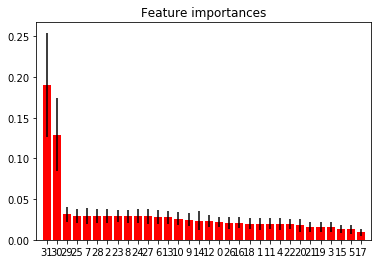

In [14]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier



# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

X= df_p_5L.iloc[:,0:32]
y= df_p_5L['G3']
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [60]:
! jupyter nbconvert --to script CSC_522_FinalProject_5LevelClassification.ipynb

[NbConvertApp] Converting notebook CSC_522_FinalProject_5LevelClassification.ipynb to script
[NbConvertApp] Writing 13547 bytes to CSC_522_FinalProject_5LevelClassification.py
